# Car Object Detection AI

## Libraries

In [1]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output, display
import matplotlib.pyplot as plt

## Data Loading

In [2]:
solutionBox = pd.read_csv('./data/train_solution_bounding_boxes.csv')
print(solutionBox.shape)

(559, 5)


In [3]:
img_h, img_w, num_channels = (380, 676, 3)
solutionBox['image'] = solutionBox['image'].apply(lambda x: x.split('.')[0])
solutionBox['x_center'] = (solutionBox['xmin'] + solutionBox['xmax'])/2
solutionBox['y_center'] = (solutionBox['ymin'] + solutionBox['ymax'])/2
solutionBox['w'] = solutionBox['xmax'] - solutionBox['xmin']
solutionBox['h'] = solutionBox['ymax'] - solutionBox['ymin']
solutionBox['classes'] = 0
solutionBox['x_center'] = solutionBox['x_center']/img_w
solutionBox['w'] = solutionBox['w']/img_w
solutionBox['y_center'] = solutionBox['y_center']/img_h
solutionBox['h'] = solutionBox['h']/img_h
print(solutionBox.head())

         image        xmin        ymin        xmax        ymax  x_center  \
0   vid_4_1000  281.259045  187.035071  327.727931  223.225547  0.450434   
1  vid_4_10000   15.163531  187.035071  120.329957  236.430180  0.100217   
2  vid_4_10040  239.192475  176.764801  361.968162  236.430180  0.444645   
3  vid_4_10020  496.483358  172.363256  630.020260  231.539575  0.833213   
4  vid_4_10060   16.630970  186.546010  132.558611  238.386422  0.110347   

   y_center         w         h  classes  
0  0.539817  0.068741  0.095238        0  
1  0.557191  0.155572  0.129987        0  
2  0.543678  0.181621  0.157014        0  
3  0.531451  0.197540  0.155727        0  
4  0.559122  0.171491  0.136422        0  


In [5]:
index = list(set(solutionBox.image))
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'./data/training_images/{image}.jpg')
img.shape

Image ID: vid_4_28880


(380, 676, 3)

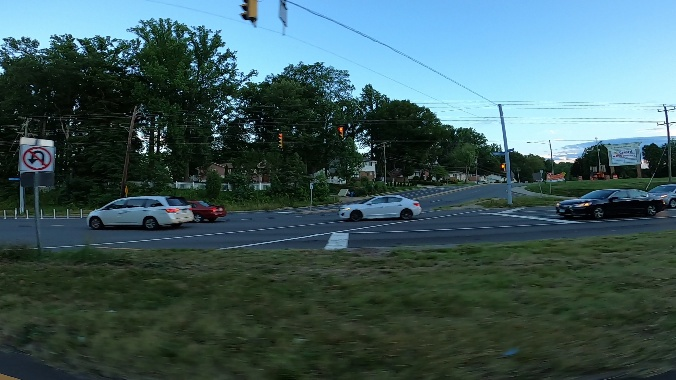

In [6]:
image = random.choice(index)
Image(filename=f'./data/training_images/{image}.jpg',width=600)